# Linear equation systems

Here we will see a few methods to solve linear systems of equations:

$ax + by = c$ 

$dx + ey = f$

Most these methods rely on linear algebra.

The most commonly-used linear algebra packages in python are:

- numpy.linalg()
- scipy.linalg()


## 1. Graphic solution:

This method relies on finding the intersections points between the linear equations.

To do this, we:

1. Generate a vector for $x$.


2. Define: $y_1$ for the first equation, and $y_2$ for the second one.


3. Before and after the intersection point, the sign of the difference between the two will change, so we need to compute it with np.sign(y2 -y1).


4. Then, we calculate the differences between the vector values produced by the sign function, np.diff(Asign). We will always get zeroes, except at the intersection point.


5. Finally, we grab the index (idx) of the non-zero value and see to which x and y values that index corresponds: x[idx] and y[idx].


6. This pair (x[idx], y[idx]) is our solution, which you can always double check in a plot.


## Example:

Solve:

$2x -3y = 1$ 

$4x + 5y = -2$

In [52]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Generate vector

x = np.arange(-5, 5, 0.01)

In [54]:
# Get both y values

y1 = (2*x - 1)/3

y2 = (-2 - 4*x)/5

In [55]:
# Get sign vector

Asign = np.sign(y2 -y1)

In [5]:
#print(Asign)

In [56]:
# Get difference

Adiff = np.diff(Asign)

In [57]:
#print(Adiff)


In [58]:
# Get index with non-zero value
# https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html

A_arg = np.argwhere(Adiff).flatten()

In [60]:
print(A_arg)

[495]


In [62]:
print("Solution is:", float(x[A_arg]), float(y1[A_arg]))

Solution is: -0.050000000000105516 -0.36666666666673703


In [63]:
# In one go:

idx = np.argwhere(np.diff(np.sign(y2 - y1))).flatten()

In [64]:
print("Solution is:", float(x[idx]), float(y1[idx]))

Solution is: -0.050000000000105516 -0.36666666666673703


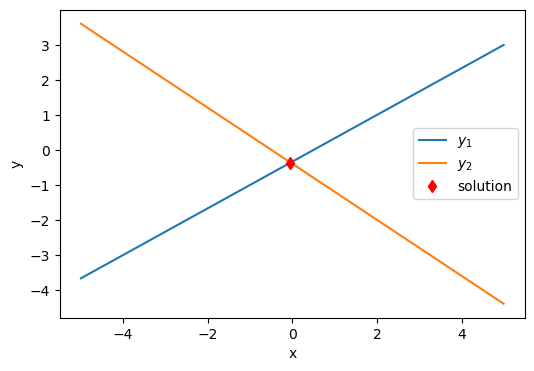

In [69]:
# Graphical solution

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1, label = r"$y_1$")
ax.plot(x, y2, label = r"$y_2$")

ax.plot(x[idx], y1[idx], 'd', c = 'red', label = "solution")

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

## 2. Using Cramer's rule

In [14]:
def cramer_function(matrix_lhs, values_rhs): 
    
    # Determinant of the original matrix
    D = np.linalg.det(matrix_lhs)
    
    # Create matrices with columns containing alternating matrix + values
    matrix1 = np.array([values_rhs, matrix_lhs[:,1]])
    matrix2 = np.array([matrix_lhs[:,0], values_rhs])
    
    # Get determinants of both
    D1 = np.linalg.det(matrix1)
    D2 = np.linalg.det(matrix2)
    
    #finding the X1, X2, X3
    sol1 = D1/D
    sol2 = D2/D
    
    return sol1, sol2

In [15]:
A = np.array([[2, -3], [4, 5]])

In [16]:
#print(A, A.shape)

In [17]:
b = np.array([1, -2])

In [18]:
sol1, sol2 = cramer_function(A, b)

In [19]:
print(sol1, sol2)

-0.04545454545454547 -0.3636363636363635


## 3. Matrix solution:

In [20]:
A = np.array([[2, -3], [4, 5]])

In [21]:
print(A)

[[ 2 -3]
 [ 4  5]]


In [22]:
b = np.array([[1], [-2]])

In [23]:
print(b)

[[ 1]
 [-2]]


In [24]:
invA = np.linalg.inv(A)

In [25]:
print(invA)

[[ 0.22727273  0.13636364]
 [-0.18181818  0.09090909]]


In [26]:
C = A @ invA

print(C)

[[1. 0.]
 [0. 1.]]


In [27]:
X = invA.dot(b)

In [28]:
print(X)

[[-0.04545455]
 [-0.36363636]]


In [29]:
X1 = invA @ b

In [30]:
print(X1)

[[-0.04545455]
 [-0.36363636]]


## Example 2:

Solve: 

$4x + 3y + 2z = 25$

$-2x + 2y + 3z = -10$

$3x -5y + 2z = -4$

In [31]:
# Let's define a function:

def z1(x, y):  # Which we can call later on
    return (-4*x - 3*y + 25)/2 # Must be indented

def z2(x, y):  # Which we can call later on
    return (+2*x - 2*y - 10)/3 # Must be indented

def z3(x, y):  # Which we can call later on
    return (-3*x + 5*y - 4)/2 # Must be indented

In [32]:
x = np.linspace(-10, 10, 30)  # Define x coordinates
y = np.linspace(-10, 10, 30)  # Define y coordinates

x_2D, y_2D = np.meshgrid(x, y)  #Create the grid, i.e., from vector coordinates, it generates a matrix of coordinates

In [33]:
Z1 = z1(x_2D, y_2D) # Call function and get Z
Z2 = z2(x_2D, y_2D) # Call function and get Z
Z3 = z3(x_2D, y_2D) # Call function and get Z

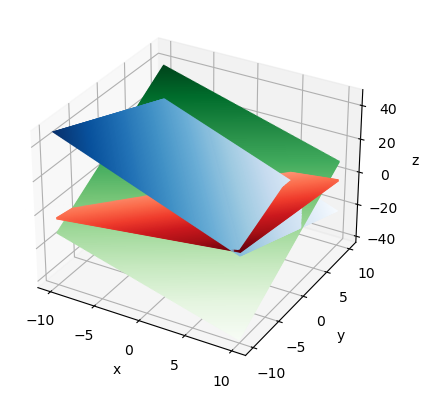

In [34]:
# Now we do some plotting:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(x_2D, y_2D, Z1, 500, cmap='Blues') # Creates 'n=100' contours at different Z to make the surface
ax.contour3D(x_2D, y_2D, Z2, 500, cmap='Reds') # Creates 'n=100' contours at different Z to make the surface
ax.contour3D(x_2D, y_2D, Z3, 500, cmap='Greens') # Creates 'n=100' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### Matrix solution of example 2:


In [35]:
A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])

In [36]:
print(A)

[[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]


In [37]:
b = np.array([25, -10, -4])

In [38]:
print(b)

[ 25 -10  -4]


In [39]:
X = np.linalg.inv(A).dot(b)
print(X)

[ 5.  3. -2.]


## 4. Solvinf linear equations system wth symbolic algebra (sympy)

#### Documentation:
https://www.sympy.org/en/index.html


#### About Sympy:
SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

conda install sympy

In [40]:
import sympy as sp
from sympy.solvers.solveset import linsolve

Solve: 

$4x + 3y + 2z = 25$

$-2x + 2y + 3z = -10$

$3x -5y + 2z = -4$

### a) Based on a list of equations:

#### 1. Define symbols

In [41]:
# 1. Define symbols

x, y, z = sp.symbols('x, y, z')

#### 2) List of equations:

In [42]:
solution = linsolve([4*x + 3*y + 2*z - 25,\
                     -2*x + 2*y + 3*z + 10,\
                     3*x - 5*y + 2*z + 4], (x, y, z))

print(solution)

{(5, 3, -2)}


### b) Using an augmented matrix:

In [43]:
solution2 = linsolve(sp.Matrix(([4, 3, 2, 25],\
                                [-2, 2, 3, -10], [3, -5, 2, -4])), (x, y, z))

print(solution2)

solution2_list = list(solution2)

print(solution2_list[0])
print(solution2_list[0][0])

{(5, 3, -2)}
(5, 3, -2)
5


### c) Using a numpy-like matrix (A*x = b) form

In [44]:
M = sp.Matrix(([4, 3, 2, 25], [-2, 2, 3, -10],\
               [3, -5, 2, -4]))

print(M)

print(M[:, :-1])
print(M[:, -1])

Matrix([[4, 3, 2, 25], [-2, 2, 3, -10], [3, -5, 2, -4]])
Matrix([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
Matrix([[25], [-10], [-4]])


In [45]:
system = A, b = M[:, :-1], M[:, -1]

In [46]:
solution3 = linsolve(system, x, y, z)

print(solution3)

{(5, 3, -2)}
